# Regression model for note splitting

In [1]:
import numpy as np
import soundfile as sf

# Using pandas library

In [10]:
import statsmodels.api as sm
import pandas as pd 

In [150]:
filename = 'C4_61_64_67_71.wav'

#number of keys (should be 12) to be considered here
num_notes = 12

#level of significance
alpha = 0.00001

# assuming that we have 12 vectors of length 4096: A,A_sharp,B.......G_sharp
#these are the fourier transforms of the notes
# then we can make a matrix X, with the columns as these notes

#X is a 2048 by 12 matrix
X = np.zeros((2048,num_notes))


#reading the sound file

for i in range(12):
    ref, sample_rate = sf.read('C4_' + str(i+60) +'_x_x_x.wav')
    note = np.fft.fft(ref[20000:24096,0]) 
    note_new = note.real[0:len(note)/2]
    X[:,i] = note_new
    

ref, sample_rate = sf.read(filename)
note = np.fft.fft(ref[20000:24096,0])
note_new = note.real[0:len(note)/2]
Y = note_new
print Y


# define the predictors and target values in data frames
x = pd.DataFrame(X)
y = pd.DataFrame(Y)

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
print "summary:", model.summary()


44100
[ 0.19989014  0.33406753  0.24234739 ..., -0.0082267  -0.00873673
 -0.00867961]
summary:                             OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     999.2
Date:                Mon, 14 May 2018   Prob (F-statistic):               0.00
Time:                        15:38:36   Log-Likelihood:                -625.93
No. Observations:                2048   AIC:                             1276.
Df Residuals:                    2036   BIC:                             1343.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------

In [6]:
print "r-squared value:", model.rsquared

involved_notes = []
for i in range(len(model.pvalues)):
    if model.pvalues[i] < alpha:
        involved_notes.append(i+60)
                      
print involved_notes
print "mystery chord is", filename
print "degree of significance, alpha is:", alpha

r-squared value: 0.854838984231
[61, 64, 67, 71]
mystery chord is C4_61_64_67_71.wav
degree of significance, alpha is: 1e-05


# Using librosa in cqt

## Using librosa and plotting out a cqt plot

In [144]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
from matplotlib import cm

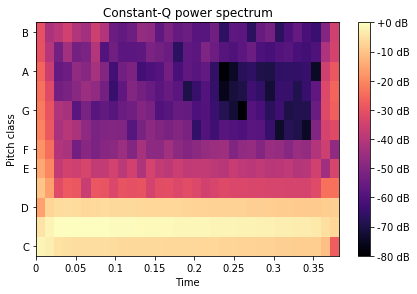

In [171]:
y, sr = librosa.load('C4_61_x_x_x.wav', sr= None)
#y, sr = librosa.load('C4_61_64_67_71.wav')

#loading points into the data
#there will be 1 sample taken at the start, and then another taken a hop_length away
# y=y[16384:32768]  #empirically speaking, this is the best part of the note, that are in powers of 2


C = librosa.cqt(y[16384:32768], sr=sr, hop_length=512, fmin=librosa.note_to_hz('C4'),
                n_bins=12, bins_per_octave=12, tuning=None,
                filter_scale=1, norm=1, sparsity=0.01)

# Plotting
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                          sr=sr, x_axis='time', y_axis='chroma')

#this line might be redundant. But the code didn't run on my comp when this wasn't in.
librosa.display.cmap(librosa.amplitude_to_db(C, ref=np.max), robust=False, cmap_seq='magma',
                     cmap_bool='gray_r', cmap_div='coolwarm')

plt.colorbar(format='%+2.0f dB')
plt.show()
plt.title('Constant-Q power spectrum')
#plt.tight_layout()



In [185]:
filename = 'C4_61_64_67_69.wav'

#number of keys (should be 12) to be considered here
num_notes = 12

#level of significance
alpha = 0.05

# assuming that we have 12 vectors of length 396: A,A_sharp,B.......G_sharp
#these are the CQTs of the notes
# then we can make a matrix X, with the columns as these notes

#X is a 396 by 12 matrix
#We first realize that each "C", or each spectrogram, is a 12*33 np array.
#That makes it 12*33=396 elements. We shall use vectors of 396 elements (instead of 2048 in linear regression)
X = np.zeros((396,num_notes))


#reading the sound file
for i in range(12):
    
    ref, sample_rate = sf.read('C4_' + str(i+60) +'_x_x_x.wav')
    C = librosa.cqt(ref[16384:32768,0], sr=sr, hop_length=512, fmin=librosa.note_to_hz('C4'),
                n_bins=12, bins_per_octave=12, tuning=None,
                filter_scale=1, norm=1, sparsity=0.01)
    spec_vector = np.reshape(C.real, (396))
    X[:,i] = spec_vector
    

ref, sample_rate = sf.read(filename)
C = librosa.cqt(ref[16384:32768,0], sr=sr, hop_length=512, fmin=librosa.note_to_hz('C4'),
            n_bins=12, bins_per_octave=12, tuning=None,
            filter_scale=1, norm=1, sparsity=0.01)
Y = np.reshape(C.real, (396))


# define the predictors and target values in data frames
x = pd.DataFrame(X)
y = pd.DataFrame(Y)

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
print "summary:", model.summary()



summary:                             OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     16.79
Date:                Mon, 14 May 2018   Prob (F-statistic):           8.06e-29
Time:                        16:16:27   Log-Likelihood:                 370.74
No. Observations:                 396   AIC:                            -717.5
Df Residuals:                     384   BIC:                            -669.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              0.0521      0.043      1.200

In [186]:
print "r-squared value:", model.rsquared

involved_notes = []
for i in range(len(model.pvalues)):
    if model.pvalues[i] < alpha:
        involved_notes.append(i+60)
                      
print involved_notes
print "mystery chord is", filename
print "degree of significance, alpha is:", alpha

r-squared value: 0.344120277936
[61, 64, 67, 69]
mystery chord is C4_61_64_67_69.wav
degree of significance, alpha is: 0.05


In [161]:
## Legacy code. Not using this function anymore. Good for reference
## Taken from https://www.programcreek.com/python/example/98226/librosa.cqt
## Minor edits to the taken one due to version errors and fitting in with our code

def feature_extract(songfile_name):
    '''
    takes: filename
    outputs: audio feature representation from that file (currently cqt)
    **assumes working directory contains raw song files**
    returns a tuple containing songfile name and numpy array of song features
    '''
    song_loc = os.path.abspath(songfile_name)
    y, sr = librosa.load(song_loc)
    print "y", len(y)
    desire_spect_len = 2048
    C = librosa.cqt(y=y[20000:24096], sr=sr, hop_length=4096, fmin=note_to_hz('C4'),
                    n_bins=12, bins_per_octave=12, tuning=None,
                    filter_scale=1, norm=1, sparsity=0.01)
    print len(C),C
    # get log-power spectrogram with noise floor of -80dB
    C = librosa.amplitude_to_db(C[0]**2, ref = np.max)
    # scale log-power spectrogram to positive integer value for smaller footpint
    noise_floor_db = 80
    scaling_factor = (2**16 - 1)/noise_floor_db
    C += noise_floor_db
    C *= scaling_factor
    C = C.astype('uint16')
    # if spectral respresentation too long, crop it, otherwise, zero-pad
    #if C.shape[1] >= desire_spect_len:
    #    C = C[:,0:desire_spect_len]
    #else:
    #    C = np.pad(C,((0,0),(0,desire_spect_len-C.shape[1])), 'constant')
    return C 